# 개와 고양이 사진 분류
---
- 로컬PC에 저장되어있는 이미지 데이터를 로딩해서 학습시키기

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [68]:
#!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [69]:
#!unzip ../content/cats_and_dogs_filtered.zip

In [70]:
import os

data_root = '/content/cats_and_dogs_filtered'
data_root

'/content/cats_and_dogs_filtered'

In [71]:
train_dir = os.path.join(data_root, 'train')
val_dir = os.path.join(data_root, 'validation')

In [72]:
# 파일명 리스트 획득

train_cats_fname = os.listdir(os.path.join(train_dir,'cats'))
train_dogs_fname = os.listdir(os.path.join(train_dir,'dogs'))

print('cats:', len(train_cats_fname))
print('dogs:', len(train_cats_fname))

cats: 1000
dogs: 1000


In [73]:
class_name = ['cats','dogs']

In [74]:
from PIL import Image
import PIL

x_train = []
y_train = []

for i in range(len(train_cats_fname)):
  f = os.path.join(train_dir, 'cats',train_cats_fname[i])
  image = PIL.Image.open(f)
  image = image.resize((224, 224))
  arr = np.array(image)
  x_train.append(arr)
  y_train.append(0)

In [75]:
for i in range(len(train_dogs_fname)):
  f = os.path.join(train_dir, 'dogs',train_dogs_fname[i])
  image = PIL.Image.open(f)
  image = image.resize((224, 224))
  arr = np.array(image)
  x_train.append(arr)
  y_train.append(1)

# 검증 데이터

In [76]:
# 파일명 리스트 획득

val_cats_fname = os.listdir(os.path.join(val_dir,'cats'))
val_dogs_fname = os.listdir(os.path.join(val_dir,'dogs'))

print('cats:', len(val_cats_fname))
print('dogs:', len(val_cats_fname))

import PIL

x_val = []
y_val = []

for i in range(len(val_cats_fname)):
  f = os.path.join(val_dir, 'cats',val_cats_fname[i])
  image = PIL.Image.open(f)
  image = image.resize((224, 224))
  arr = np.array(image)
  x_val.append(arr)
  y_val.append(1)

cats: 500
dogs: 500


In [77]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2000, 224, 224, 3) (2000,)
(500, 224, 224, 3) (500,)


In [78]:
from sklearn.model_selection import train_test_split

x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size = 0.2, shuffle = True)

print(x_val.shape, y_val.shape)

(400, 224, 224, 3) (400,)


In [79]:
# 정규화
# 모델
# 컴파일
# 콜백
# 학습
# 그래프
# 평가evaluate
# 혼동평가

In [80]:
x_trian = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_val = x_val.astype('float32')/255.

In [81]:
model = keras.Sequential([
    layers.Conv2D(16,3, activation = 'relu', input_shape = (224, 224, 3)),
    layers.MaxPooling2D(2),
    layers.Conv2D(32,3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(64,3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(128,3, activation = 'relu'),
    layers.MaxPooling2D(2),

    layers.Flatten(),

    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 1, activation = 'sigmoid')
])

In [82]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 26, 26, 64)      

In [83]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [84]:
# 콜백

model = keras.Sequential([
    layers.Conv2D(16,3, activation = 'relu', input_shape = (224, 224, 3)),
    layers.MaxPooling2D(2),
    layers.BatchNormalization(),
    layers.Conv2D(32,3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.BatchNormalization(),
    layers.Conv2D(64,3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.BatchNormalization(),
    layers.Conv2D(128,3, activation = 'relu'),
    layers.MaxPooling2D(2),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dropout(0.3),

    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dense(units = 1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

In [85]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 batch_normalization_8 (Batc  (None, 111, 111, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                      

In [86]:
from tensorflow.keras import callbacks

es_callbacks = callbacks.EarlyStopping(
    monitor = 'val_loss',
    patience = 5
)

In [87]:
EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(x_train, y_train,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_data = (x_val, y_val),
                callbacks = [es_callbacks],
                verbose = 1
                )

Epoch 1/30
63/63 [==============================] - 3s 17ms/step - loss: 0.9184 - acc: 0.5975 - val_loss: 0.5735 - val_acc: 1.0000
Epoch 2/30
63/63 [==============================] - 1s 13ms/step - loss: 0.6830 - acc: 0.6740 - val_loss: 0.4504 - val_acc: 1.0000
Epoch 3/30
63/63 [==============================] - 1s 13ms/step - loss: 0.5313 - acc: 0.7485 - val_loss: 2.3243 - val_acc: 0.0000e+00
Epoch 4/30
63/63 [==============================] - 1s 13ms/step - loss: 0.4881 - acc: 0.7820 - val_loss: 3.3073 - val_acc: 0.0000e+00
Epoch 5/30
63/63 [==============================] - 1s 13ms/step - loss: 0.3785 - acc: 0.8310 - val_loss: 4.3324 - val_acc: 0.0000e+00
Epoch 6/30
63/63 [==============================] - 1s 13ms/step - loss: 0.2909 - acc: 0.8740 - val_loss: 1.8436 - val_acc: 0.0000e+00
Epoch 7/30
63/63 [==============================] - 1s 13ms/step - loss: 0.2143 - acc: 0.9185 - val_loss: 4.2542 - val_acc: 0.0000e+00


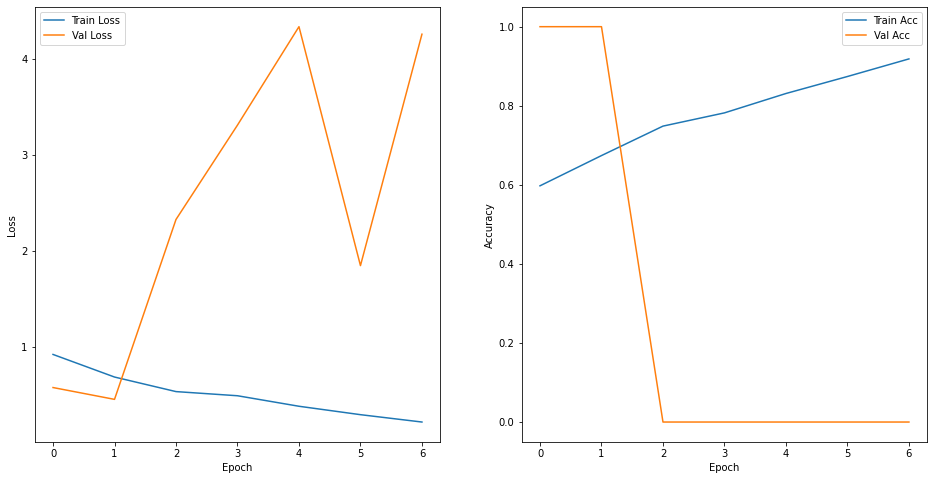

In [88]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Acc')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Acc')

    plt.legend()
    plt.show()

plot_history(log) # 그래프가 벌어지면 과적합현상이 생기기 시작한것.

In [89]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 7ms/step - loss: 4.2555 - acc: 0.0000e+00


[4.2555036544799805, 0.0]

In [90]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 6ms/step


In [94]:
y_pred = (y_pred > 0.5).astype('int')

In [95]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [97]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cfm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cfm, annot = True, cbar = False)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_val, y_pred)

ValueError: ignored